In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv('nobel.csv')

In [8]:
df.info()
df.head(5)
df.isnull().sum(axis = 1)
df.isnull().sum()
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

1912

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

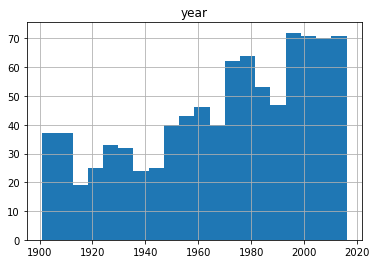

In [13]:

df.hist('year',bins=20)
#least amount of prizes were awarded around 1910s

In [25]:
df_C = df.groupby('category').count().prize
df_C

category
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204
Name: prize, dtype: int64

In [26]:
df_C.max()

211

In [30]:
df_PS = df.groupby('prize_share').count()
(df_PS.prize / df_PS.prize.sum())*100


prize_share
1/1    37.760703
1/2    33.589462
1/3    22.063666
1/4     6.586169
Name: prize, dtype: float64

In [36]:
df_S = df.groupby('sex').count()
df_S.sum().prize,df.count().prize
#the values don't match

(885, 911)

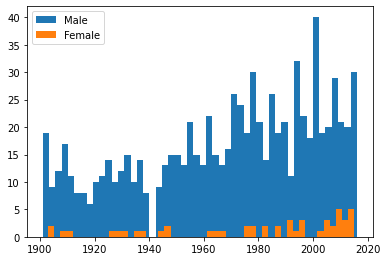

In [44]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.hist(df[df.sex == 'Male'].year, bins = 50, label = 'Male')
ax.hist(df[df.sex == 'Female'].year, bins = 50, label = 'Female')
ax.legend();

In [68]:
df_Co = df.groupby('birth_country').count().year
df_Co['United States of America']

259

In [82]:
A = df.year - pd.DatetimeIndex(df.birth_date).year
Y = min(A)
O = max(A)

print('Youngest=',Y,'Oldest=',O)

Youngest= 17.0 Oldest= 90.0


In [90]:
df.iloc[A[A==Y].index].full_name,df.iloc[A[A==O].index].full_name

(885    Malala Yousafzai
 Name: full_name, dtype: object,
 793    Leonid Hurwicz
 Name: full_name, dtype: object)

In [92]:
A.describe()

count    883.000000
mean      59.453001
std       12.399290
min       17.000000
25%       50.000000
50%       60.000000
75%       69.000000
max       90.000000
dtype: float64

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,  8.,  2.,  6.,
        11., 10., 16.,  6., 24., 15., 35., 21., 46., 21., 36., 21., 29.,
        55., 24., 40., 31., 58., 31., 47., 11., 49., 24., 42., 16., 20.,
        34., 11., 21., 11., 14.,  6.,  8.,  7.,  6.,  2.,  2.]),
 array([17.  , 18.46, 19.92, 21.38, 22.84, 24.3 , 25.76, 27.22, 28.68,
        30.14, 31.6 , 33.06, 34.52, 35.98, 37.44, 38.9 , 40.36, 41.82,
        43.28, 44.74, 46.2 , 47.66, 49.12, 50.58, 52.04, 53.5 , 54.96,
        56.42, 57.88, 59.34, 60.8 , 62.26, 63.72, 65.18, 66.64, 68.1 ,
        69.56, 71.02, 72.48, 73.94, 75.4 , 76.86, 78.32, 79.78, 81.24,
        82.7 , 84.16, 85.62, 87.08, 88.54, 90.  ]),
 <BarContainer object of 50 artists>)

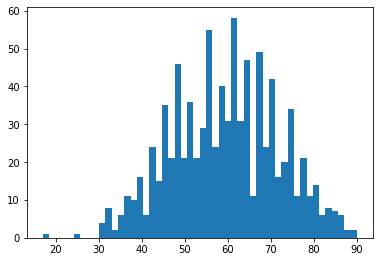

In [97]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.hist(A, bins=50)

In [103]:
dfc = df.copy()
dfc.drop('laureate_id', axis=1,inplace=True)

In [105]:
dfc['age'] = A
dfc.age

0      49.0
1      62.0
2      47.0
3      73.0
4      79.0
       ... 
906    71.0
907    65.0
908    82.0
909    65.0
910    73.0
Name: age, Length: 911, dtype: float64